In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Define the directory containing the dataset
dataset_dir = "/kaggle/input/fire-dataset/fire_dataset"

# Load and preprocess the dataset
data = []
labels = []

# Load images and labels
for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:  # Check if the image was loaded successfully
                image = cv2.resize(image, (32, 32))  # Resize the image to 32x32
                image = image.astype('float32') / 255.0  # Normalize the pixel values to [0, 1]
                data.append(image)
                labels.append(folder)
            else:
                print(f"Failed to load image: {image_path}")

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Load the pre-trained VGG-16 model without the fully connected layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional layers
for layer in vgg16_base.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the VGG-16 base model
model.add(vgg16_base)

# Add new fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 output classes: fire, non_fire

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
print("Accuracy:", accuracy)


Failed to load image: /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.189.png
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.5726 - loss: 0.6565 - val_accuracy: 0.7563 - val_loss: 0.4154
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.8300 - loss: 0.3569 - val_accuracy: 0.8875 - val_loss: 0.2836
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.9316 - loss: 0.2459 - val_accuracy: 0.8938 - val_loss: 0.2384
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 0.9153 - loss: 0.2197 - val_accuracy: 0.9062 - val_loss: 0.2109
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.9425 - loss: 0.1823 - val_accuracy: 0.9125 - val_loss: 0.1941
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.9383 - loss: 0.1682 - val_accuracy: 0.9125 - val_loss: 0.1835
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.9523 - loss: 0.1457 - val_accuracy: 0.9187 - val_loss: 0.1757
Epoch 8/

Failed to load image: /kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.189.png
Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.5548 - loss: 0.6631 - val_accuracy: 0.8400 - val_loss: 0.3656
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.8870 - loss: 0.3226 - val_accuracy: 0.9150 - val_loss: 0.2596
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.9215 - loss: 0.2390 - val_accuracy: 0.9250 - val_loss: 0.2139
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.9162 - loss: 0.1990 - val_accuracy: 0.9250 - val_loss: 0.1931
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 239ms/step - accuracy: 0.9369 - loss: 0.1745 - val_accuracy: 0.9250 - val_loss: 0.1809
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.9556 - loss: 0.1349 - val_accuracy: 0.9350 - val_loss: 0.1739
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.9604 - loss: 0.1296 - val_accuracy: 0.9350 - val_loss: 0.1677
Epoch 8

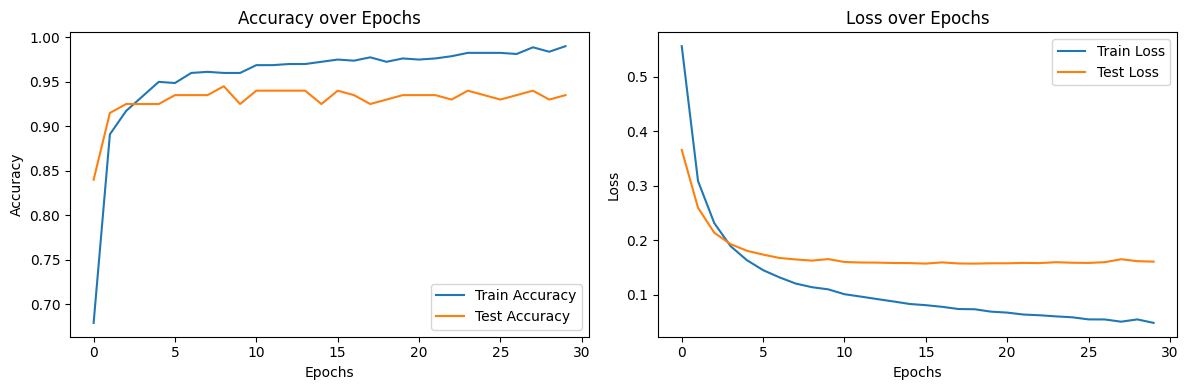

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


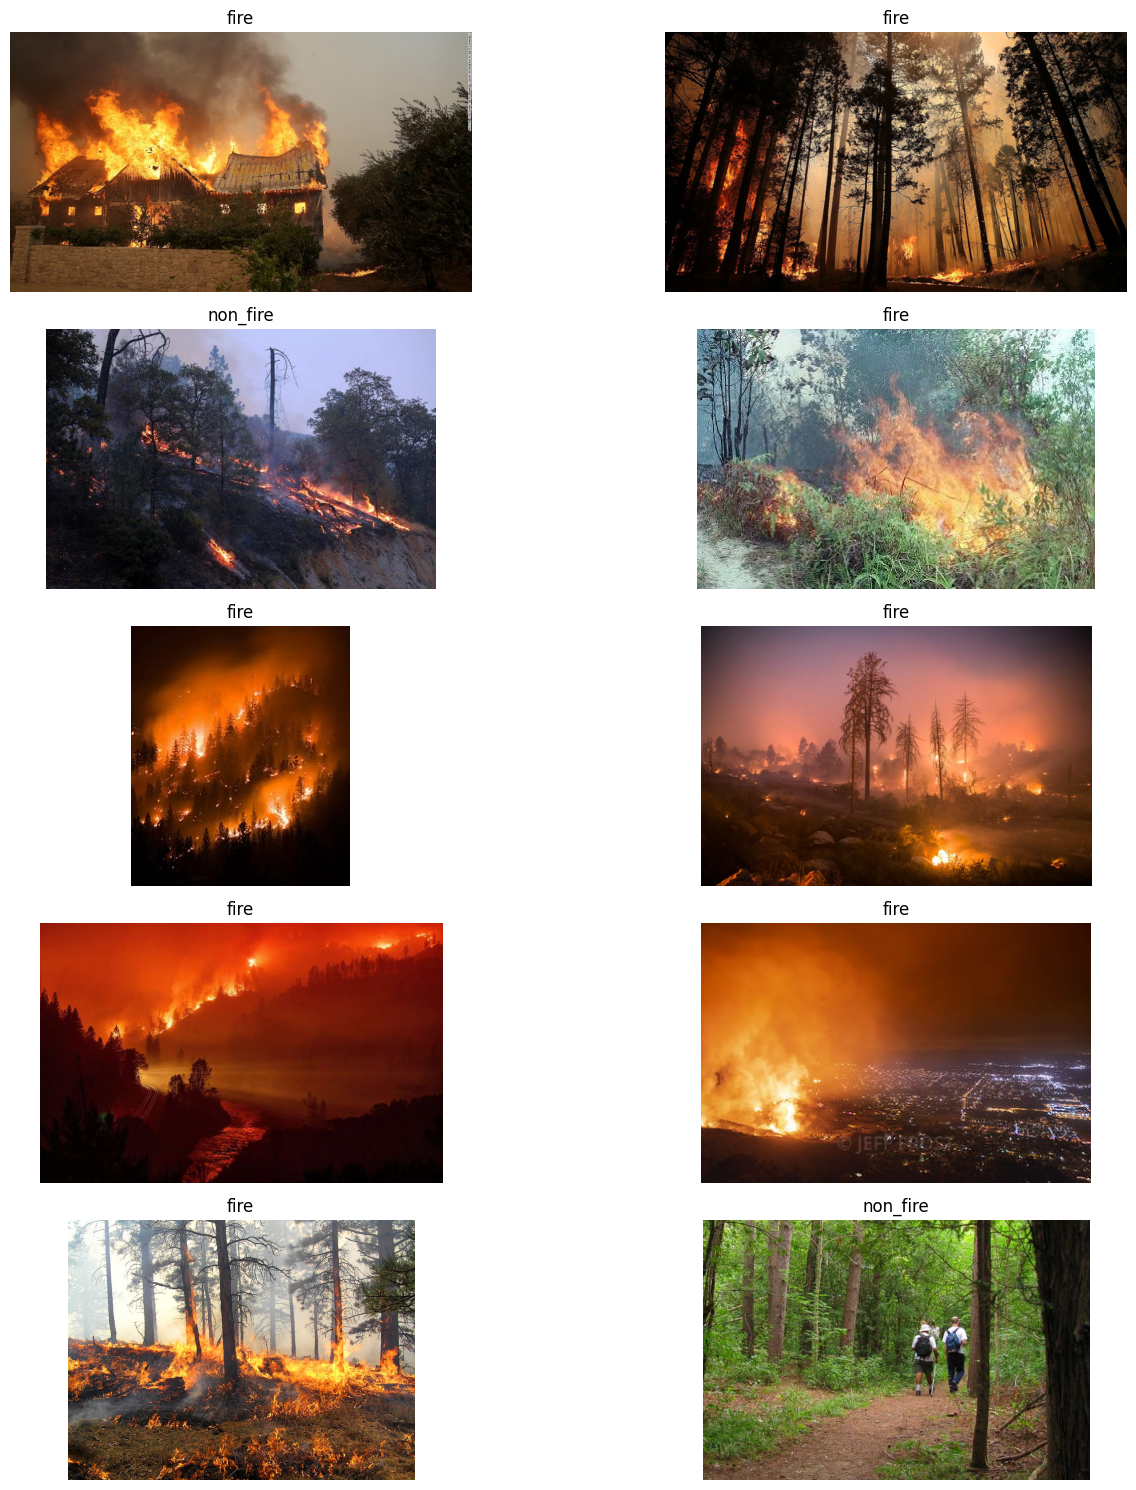

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


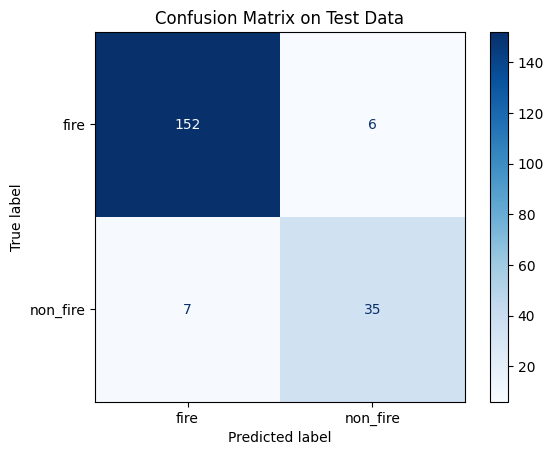

In [101]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
import matplotlib.pyplot as plt

# Define the directory containing the dataset
dataset_dir = "/kaggle/input/fire-dataset/fire_dataset"

# Load and preprocess the dataset
data = []
labels = []

# Load images and labels
for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:  # Check if the image was loaded successfully
                image = cv2.resize(image, (32, 32))  # Resize the image to 32x32
                image = image.astype('float32') / 255.0  # Normalize the pixel values to [0, 1]
                data.append(image)
                labels.append(folder)
            else:
                print(f"Failed to load image: {image_path}")

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define a function to create the model
def create_model(learning_rate=0.0001, neurons=1024):
    # Load the pre-trained VGG-16 model without the fully connected layers
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    # Freeze the convolutional layers
    for layer in vgg16_base.layers:
        layer.trainable = False

    # Create a new model
    model = Sequential()
    
    # Add the VGG-16 base model
    model.add(vgg16_base)

    # Add new fully connected layers
    model.add(Flatten())
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # 2 output classes: fire, non_fire

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Best parameters found
best_params = {
    'batch_size': 32,
    'epochs': 30,
    'learning_rate': 0.0001,
    'neurons': 1024
}

# Create the model with the best parameters
best_model = create_model(learning_rate=best_params['learning_rate'], neurons=best_params['neurons'])
history = best_model.fit(X_train, y_train, batch_size=best_params['batch_size'], epochs=best_params['epochs'], validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Plot accuracy and loss for train and test data
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        image = cv2.resize(image, (32, 32))  # Resize the image to match the input size of the model
        image = image.astype('float32') / 255.0  # Normalize the pixel values to [0, 1]
        return image
    else:
        print(f"Failed to load image: {image_path}")
        return None

# List all image paths
all_image_paths = []
for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            all_image_paths.append(os.path.join(folder_path, filename))

# Select 10 random image paths
random_image_paths = random.sample(all_image_paths, 10)

# Load and preprocess each image
images = []
for image_path in random_image_paths:
    image = load_and_preprocess_image(image_path)
    if image is not None:
        images.append(image)

# Convert the list of images to NumPy array
images = np.array(images)

# Use the model to predict fire or non-fire
predictions = best_model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

# Define class names
class_names = ['fire', 'non_fire']

# Display results
plt.figure(figsize=(15, 15))
for i, image_path in enumerate(random_image_paths):
    plt.subplot(10, 2, i + 1)
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(class_names[predicted_classes[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Calculate and display confusion matrix on test data
y_test_pred = best_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Test Data')
plt.show()


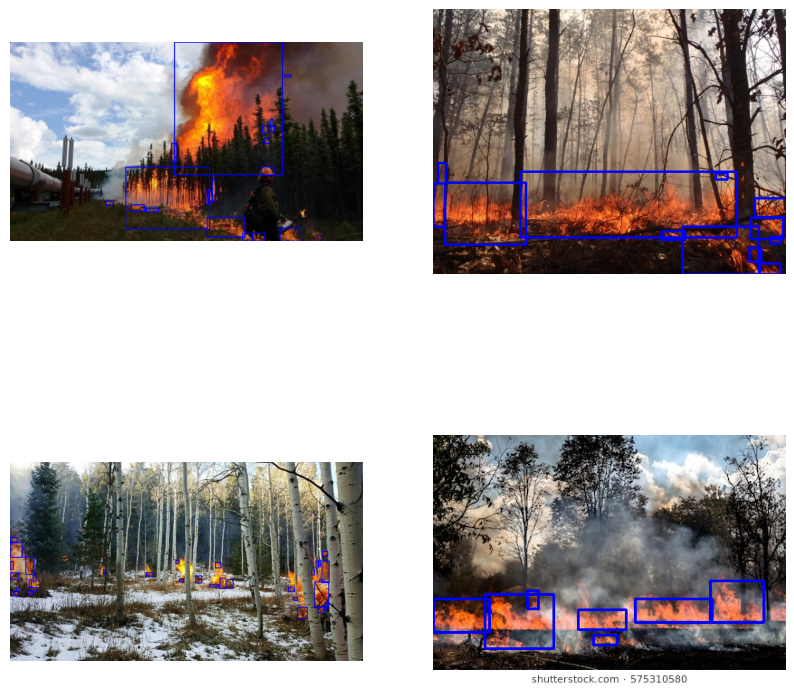

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_fire(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color range for fire detection
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])

    # Create mask to detect colors within the defined range
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Extract regions where fire is detected
    fire_regions = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

    # Draw bounding boxes around fire regions with minimum specified dimensions
    for contour in fire_regions:
        x, y, w, h = cv2.boundingRect(contour)
        if w * h > 100:  # Filtering boxes based on a minimum area threshold
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    return image

# Paths to sample images
image_paths = [
    '/kaggle/input/fire-dataset/fire_dataset/fire_images/fire.103.png',
    '/kaggle/input/fire-dataset/fire_dataset/fire_images/fire.10.png',
    '/kaggle/input/fire-dataset/fire_dataset/fire_images/fire.106.png',
    '/kaggle/input/fire-dataset/fire_dataset/fire_images/fire.111.png'
]

# Read and process images
images = []
for path in image_paths:
    img = cv2.imread(path)
    if img is not None:
        img_with_fire = detect_fire(img)
        images.append(img_with_fire)

# Display images
plt.figure(figsize=(10, 10))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()
